<a href="https://colab.research.google.com/github/AalyanArifMahmood/workshop-graphql-netflix/blob/main/iX_Class_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The World Happiness Report 2021



### Load in the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
 pip install -U kaleido

     |████████████████████████████████| 79.9 MB 45 kB/s 


In [2]:
pip install plotly==4.14.3

     |████████████████████████████████| 13.2 MB 147 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import warnings
warnings.simplefilter("ignore")

In [159]:
import plotly.io as pio

In [8]:
happiness2021 = pd.read_csv('world-happiness-report-2021.csv')

In [9]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
happiness2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [58]:
happiness2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [10]:
happiness2021 = happiness2021.drop(["Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices"
, "Explained by: Generosity", "Explained by: Perceptions of corruption", "Explained by: Social support", "Explained by: Log GDP per capita"], axis=1)
happiness2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,2.798


In [11]:
duplicate_rows_happiness2021 = happiness2021[happiness2021.duplicated()]

print(duplicate_rows_happiness2021.shape)

(0, 14)


In [12]:
happiness2021.rename(columns = {'Healthy life expectancy':'Healthy_life_expectancy', "Logged GDP per capita":"Logged_GDP_per_capita"
, "Ladder score": "Ladder_score", "Social support": "Social_support", "Freedom to make life choices": "Freedom_to_make_life_choices", 
"Perceptions of corruption": "Perceptions_of_corruption"}, inplace = True)
happiness2021.dtypes

Country name                       object
Regional indicator                 object
Ladder_score                      float64
Standard error of ladder score    float64
upperwhisker                      float64
lowerwhisker                      float64
Logged_GDP_per_capita             float64
Social_support                    float64
Healthy_life_expectancy           float64
Freedom_to_make_life_choices      float64
Generosity                        float64
Perceptions_of_corruption         float64
Ladder score in Dystopia          float64
Dystopia + residual               float64
dtype: object

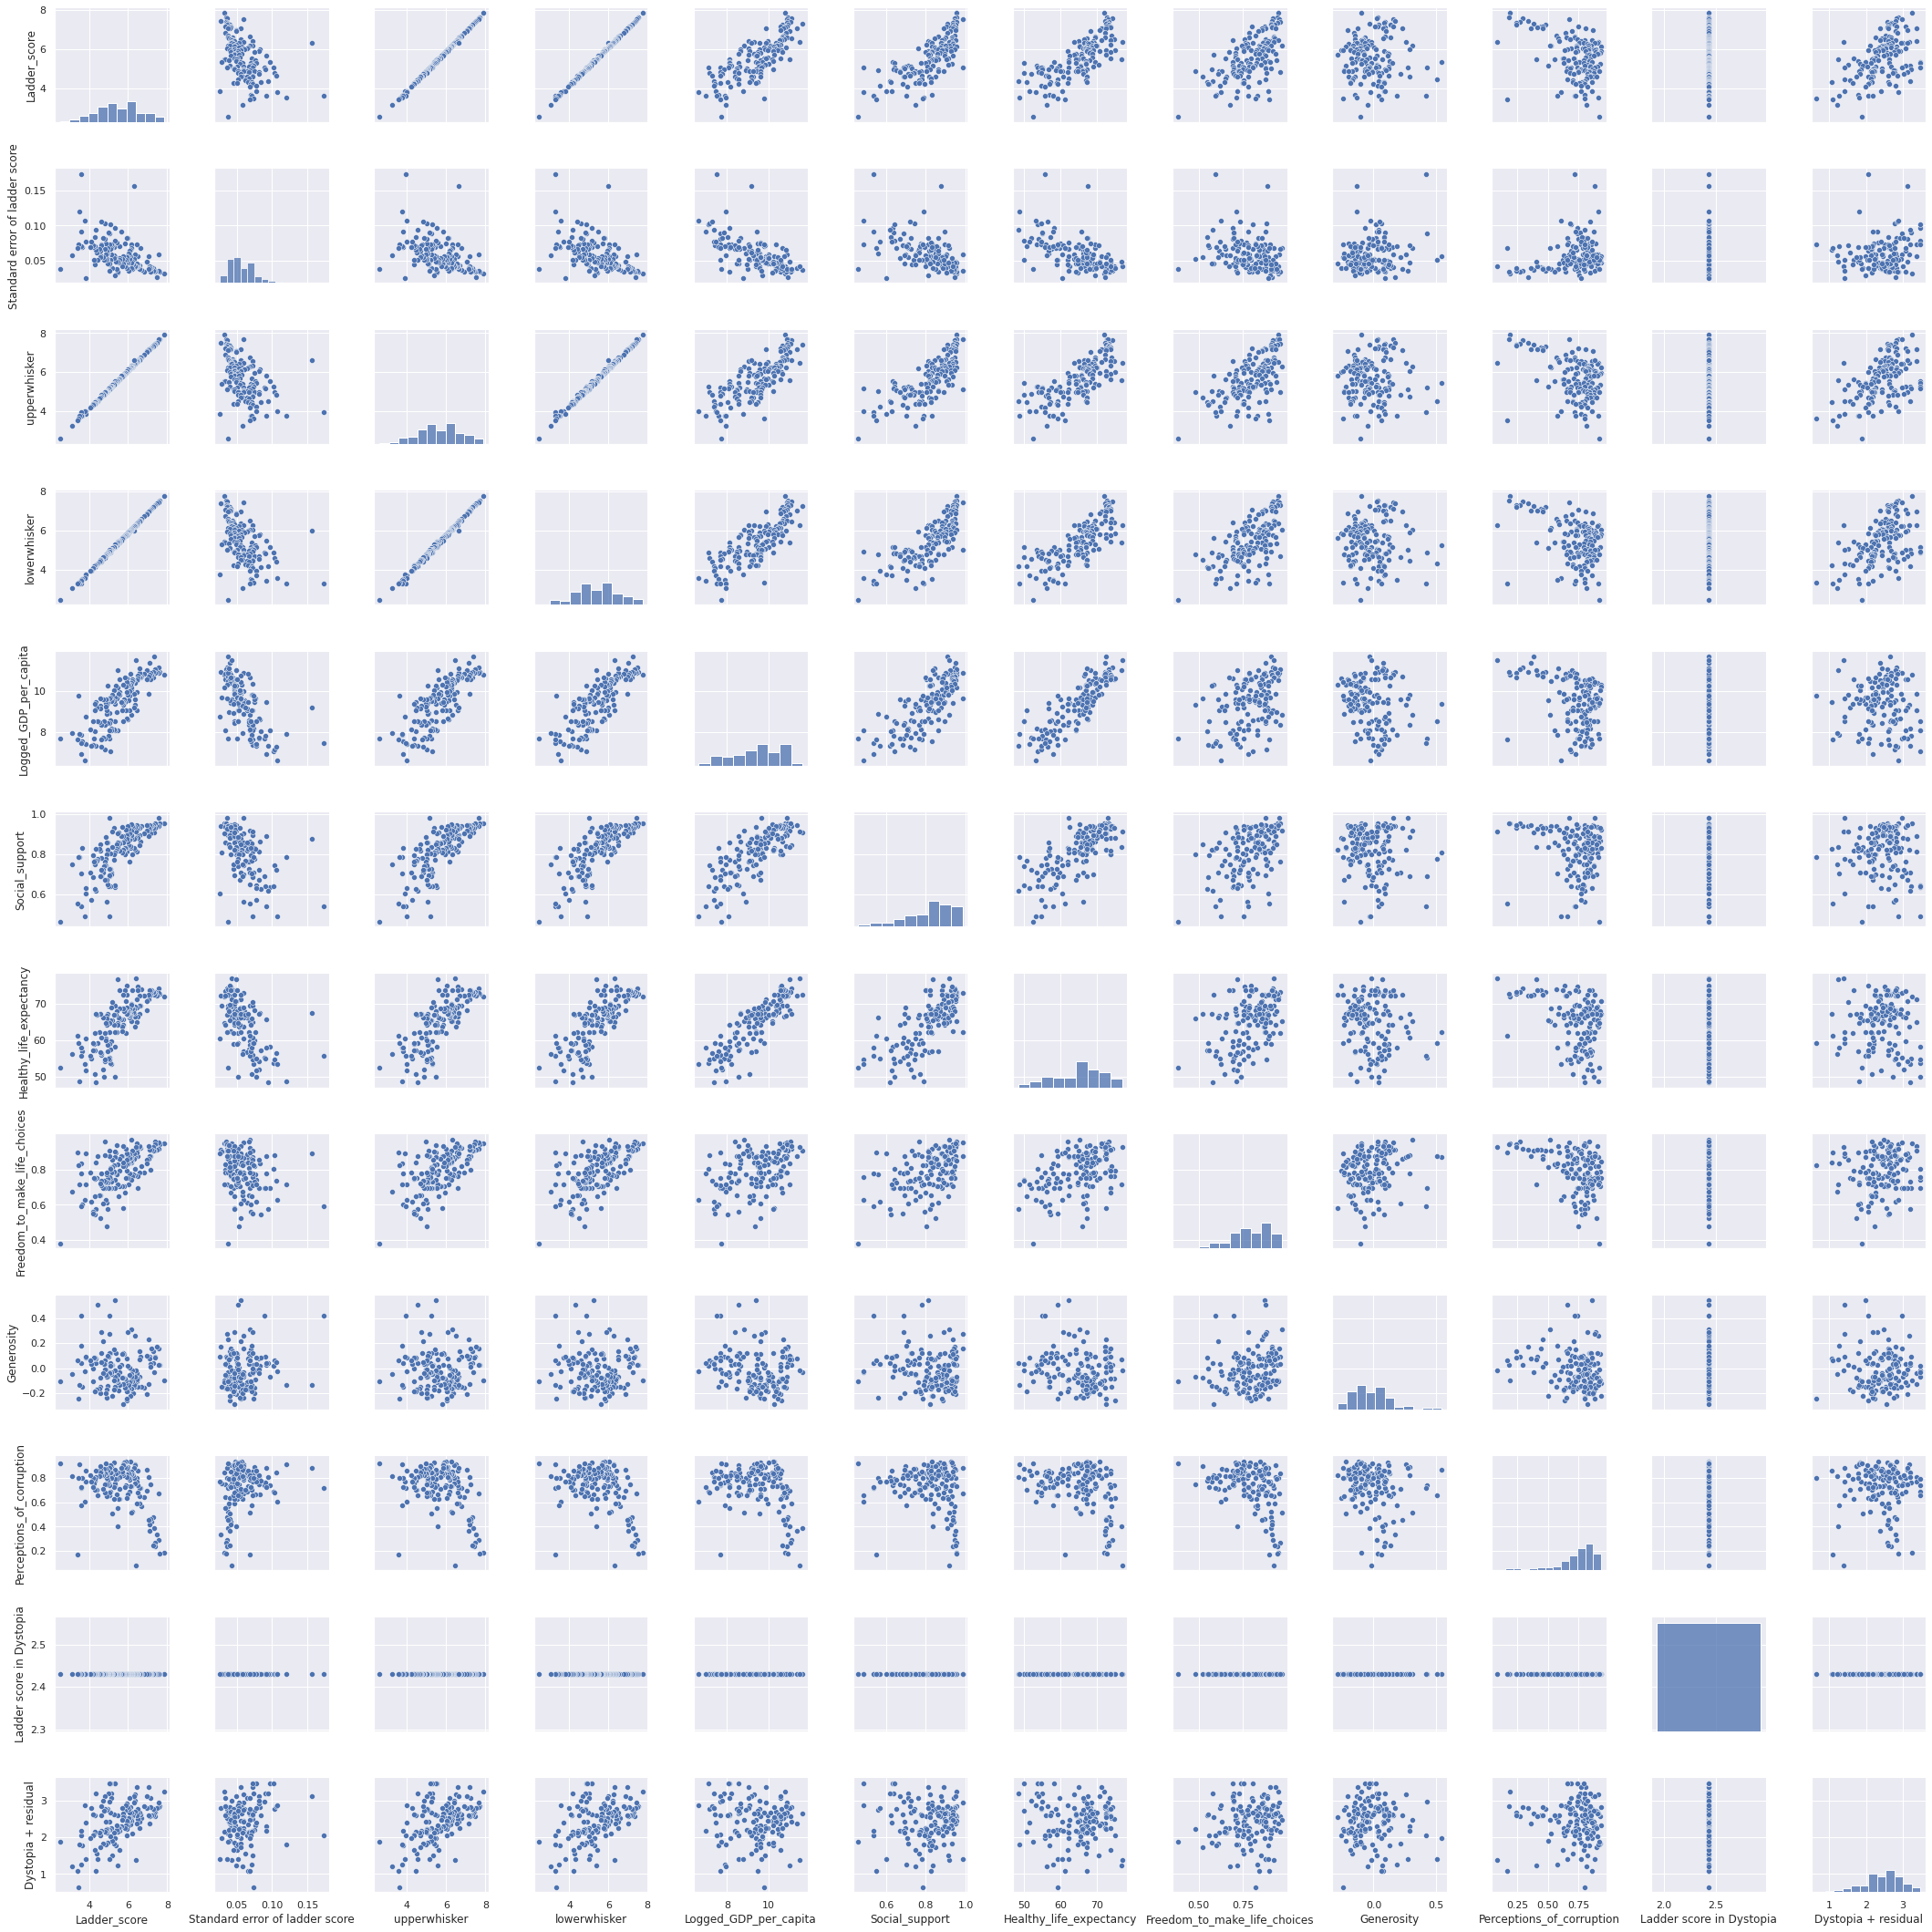

In [62]:
numeric_columns = happiness2021.columns[happiness2021.dtypes != 'object']
sns.pairplot(happiness2021[numeric_columns])

In [166]:
fig1 = px.sunburst(happiness2021, path=['Regional indicator','Country name'], values='Ladder_score',
                  color='Ladder_score',
                  color_continuous_scale='rdylbu',
                  color_continuous_midpoint=np.average(happiness2021['Ladder_score'], weights=happiness2021['Ladder_score']), range_color=(2,8))
fig1.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig1.show()

In [167]:
pio.write_image(fig1, "Global", format='png')

In [64]:
western_europe = happiness2021[happiness2021["Regional indicator"]=="Western Europe"]
sub_saharan_africa = happiness2021[happiness2021["Regional indicator"]=="Sub-Saharan Africa"]
latin_america_and_caribbean = happiness2021[happiness2021["Regional indicator"]=="Latin America and Caribbean"]
central_eastern_europe = happiness2021[happiness2021["Regional indicator"]=="Central and Eastern Europe"]
middle_east_north_africa = happiness2021[happiness2021["Regional indicator"]=="Middle East and North Africa"]
commonwealth_indep_states = happiness2021[happiness2021["Regional indicator"]=="Commonwealth of Independent States"]
southeast_asia = happiness2021[happiness2021["Regional indicator"]=="Southeast Asia"]
east_asia = happiness2021[happiness2021["Regional indicator"]=="East Asia"]
south_asia = happiness2021[happiness2021["Regional indicator"]=="South Asia"]
north_america_anz = happiness2021[happiness2021["Regional indicator"]=="North America and ANZ"]

In [168]:
fig2 = px.sunburst(western_europe, path=['Regional indicator','Country name'], values='Ladder_score',
                  color='Ladder_score',
                  color_continuous_scale='rdylbu',
                  color_continuous_midpoint=np.average(western_europe['Ladder_score'], weights=western_europe['Ladder_score']), range_color=(2,8))
fig2.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig2.show()

In [169]:
fig3 = px.sunburst(sub_saharan_africa, path=['Regional indicator','Country name'], values='Ladder_score',
                  color='Ladder_score',
                  color_continuous_scale='rdylbu',
                  color_continuous_midpoint=np.average(sub_saharan_africa['Ladder_score'], weights=sub_saharan_africa['Ladder_score']), range_color=(2,8))
fig3.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig3.show()

In [170]:
fig4 = px.sunburst(latin_america_and_caribbean, path=['Regional indicator','Country name'], values='Ladder_score',
                  color='Ladder_score',
                  color_continuous_scale='rdylbu',
                  color_continuous_midpoint=np.average(latin_america_and_caribbean['Ladder_score'], weights=latin_america_and_caribbean['Ladder_score']),range_color=(2,8))
fig4.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig4.show()

In [171]:
fig5 = px.sunburst(central_eastern_europe, path=['Regional indicator','Country name'], values='Ladder_score',
                  color='Ladder_score',
                  color_continuous_scale='rdylbu',
                  color_continuous_midpoint=np.average(central_eastern_europe['Ladder_score'], weights=central_eastern_europe['Ladder_score']), range_color=(2,8))
fig5.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig5.show()

In [172]:
fig6 = px.sunburst(southeast_asia, path=['Regional indicator','Country name'], values='Ladder_score',
                  color='Ladder_score',
                  color_continuous_scale='rdylbu',
                  color_continuous_midpoint=np.average(southeast_asia['Ladder_score'], weights=southeast_asia['Ladder_score']), range_color=(2,8))
fig6.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig6.show()

In [173]:
fig7 = px.sunburst(middle_east_north_africa, path=['Regional indicator','Country name'], values='Ladder_score',
                  color='Ladder_score',
                  color_continuous_scale='rdylbu',
                  color_continuous_midpoint=np.average(middle_east_north_africa['Ladder_score'], weights=middle_east_north_africa['Ladder_score']), range_color=(2,8))
fig7.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig7.show()

In [174]:
fig8 = px.sunburst(commonwealth_indep_states, path=['Regional indicator','Country name'], values='Ladder_score',
                  color='Ladder_score',
                  color_continuous_scale='rdylbu',
                  color_continuous_midpoint=np.average(commonwealth_indep_states['Ladder_score'], weights=commonwealth_indep_states['Ladder_score']), range_color=(2,8))
fig8.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig8.show()

In [175]:
fig9 = px.sunburst(east_asia, path=['Regional indicator','Country name'], values='Ladder_score',
                  color='Ladder_score',
                  color_continuous_scale='rdylbu',
                  color_continuous_midpoint=np.average(east_asia['Ladder_score'], weights=east_asia['Ladder_score']), range_color=(2,8))
fig9.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig9.show()

In [176]:
fig10 = px.sunburst(south_asia, path=['Regional indicator','Country name'], values='Ladder_score',
                  color='Ladder_score',
                  color_continuous_scale='rdylbu',
                  color_continuous_midpoint=np.average(south_asia['Ladder_score'], weights=south_asia['Ladder_score']), range_color=(2,8))
fig10.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig10.show()

In [177]:
fig11 = px.sunburst(north_america_anz, path=['Regional indicator','Country name'], values='Ladder_score',
                  color='Ladder_score',
                  color_continuous_scale='rdylbu',
                  color_continuous_midpoint=np.average(north_america_anz['Ladder_score'], weights=north_america_anz['Ladder_score']), range_color=(2,8))
fig11.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig11.show()

In [178]:
pio.write_image(fig2, "fig2", format='png')
pio.write_image(fig3, "fig3", format='png')
pio.write_image(fig4, "fig4", format='png')
pio.write_image(fig5, "fig5", format='png')
pio.write_image(fig6, "fig6", format='png')
pio.write_image(fig7, "fig7", format='png')
pio.write_image(fig8, "fig8", format='png')
pio.write_image(fig9, "fig9", format='png')
pio.write_image(fig10, "fig10", format='png')
pio.write_image(fig11, "fig11", format='png')

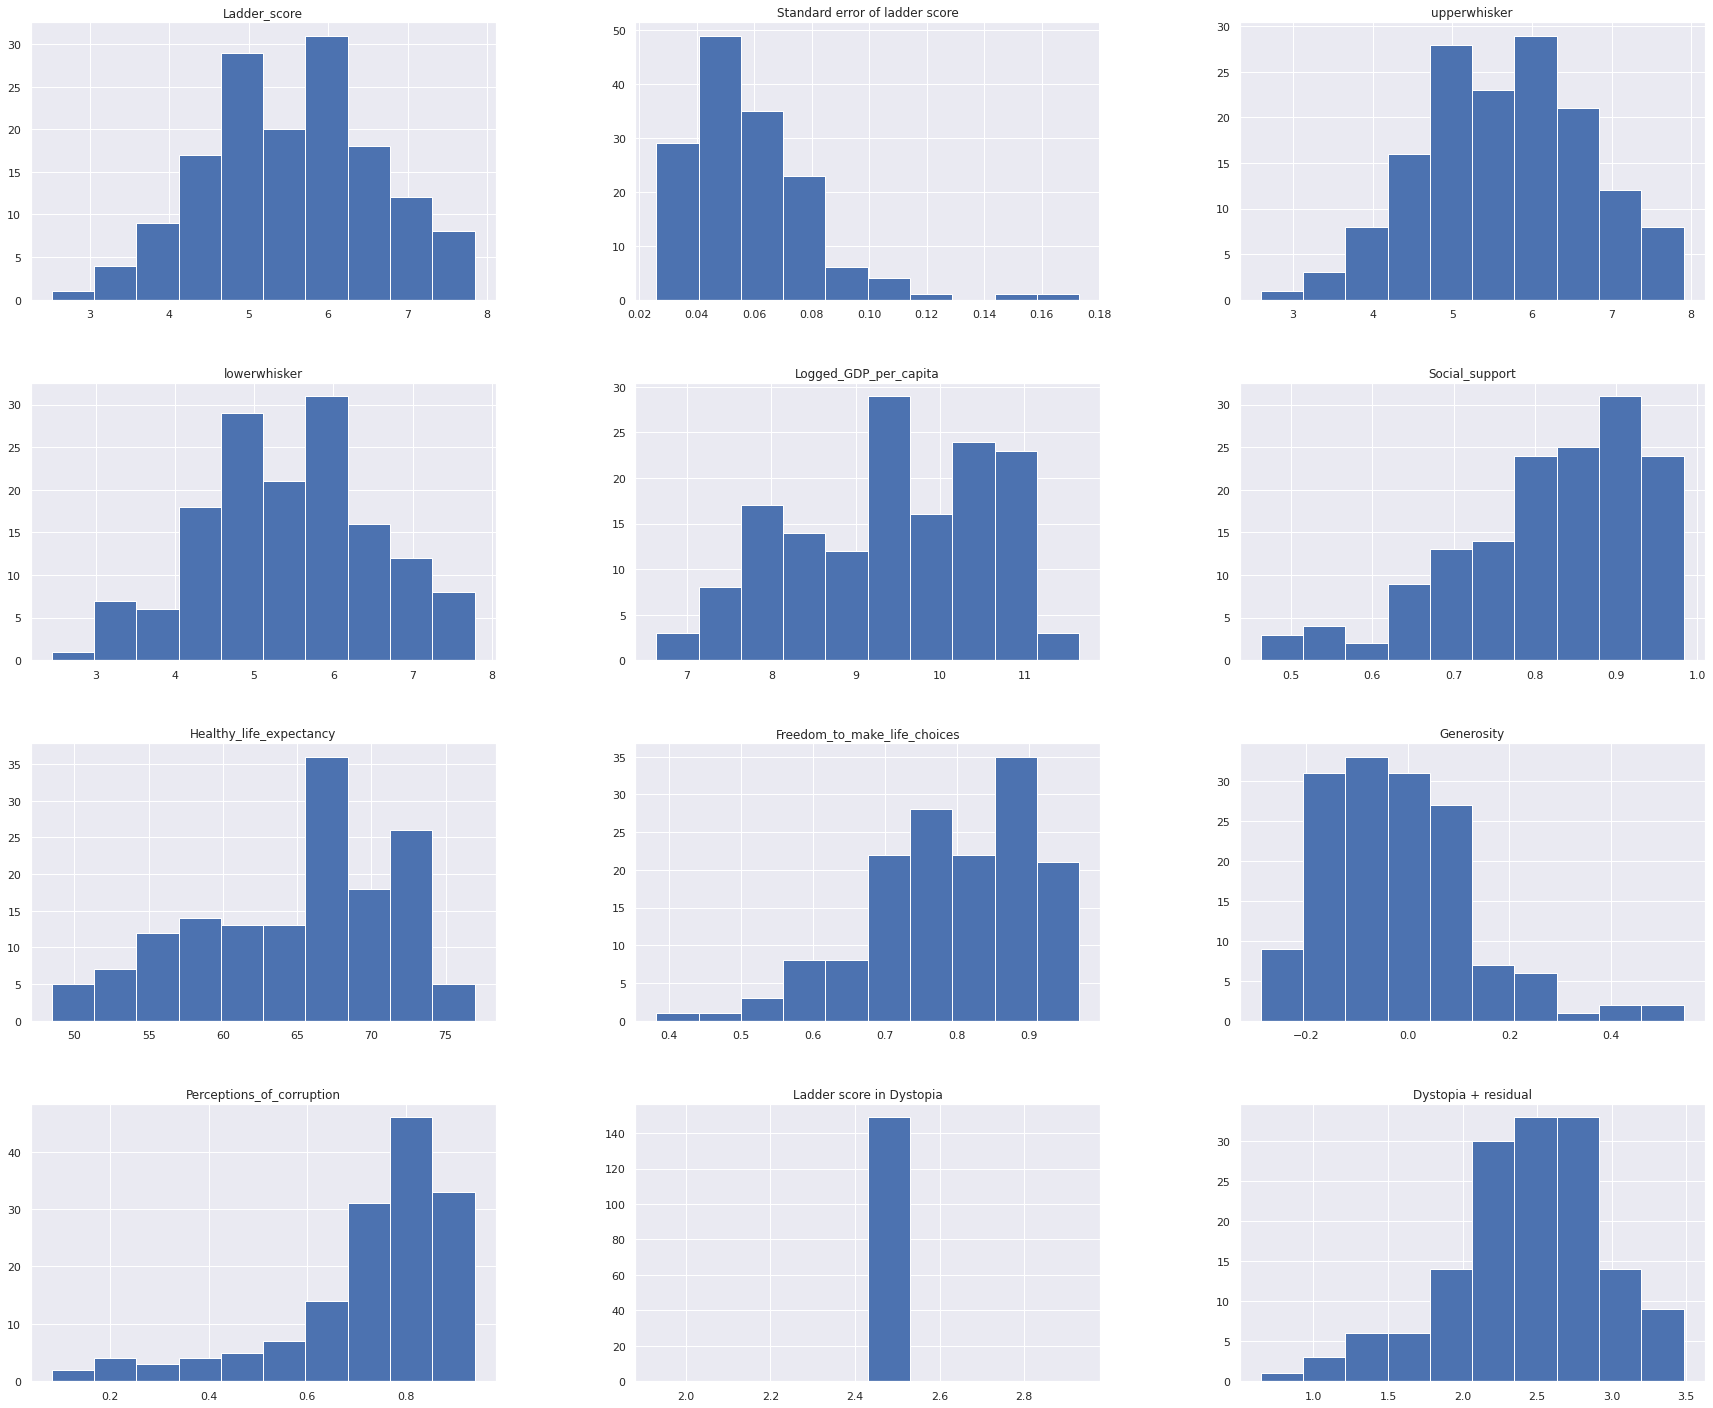

In [75]:
happiness2021.hist(figsize=(30,25))
plt.show()

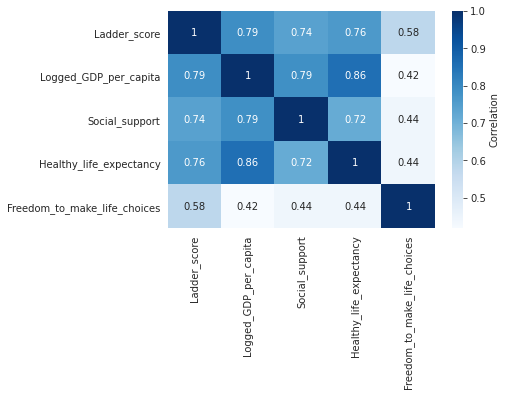

In [102]:
subset = happiness2021.loc[:,['Ladder_score','Logged_GDP_per_capita','Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices']]
sns.heatmap(subset.corr(), annot=True, cbar_kws={'label': 'Correlation'}, cmap='Blues')

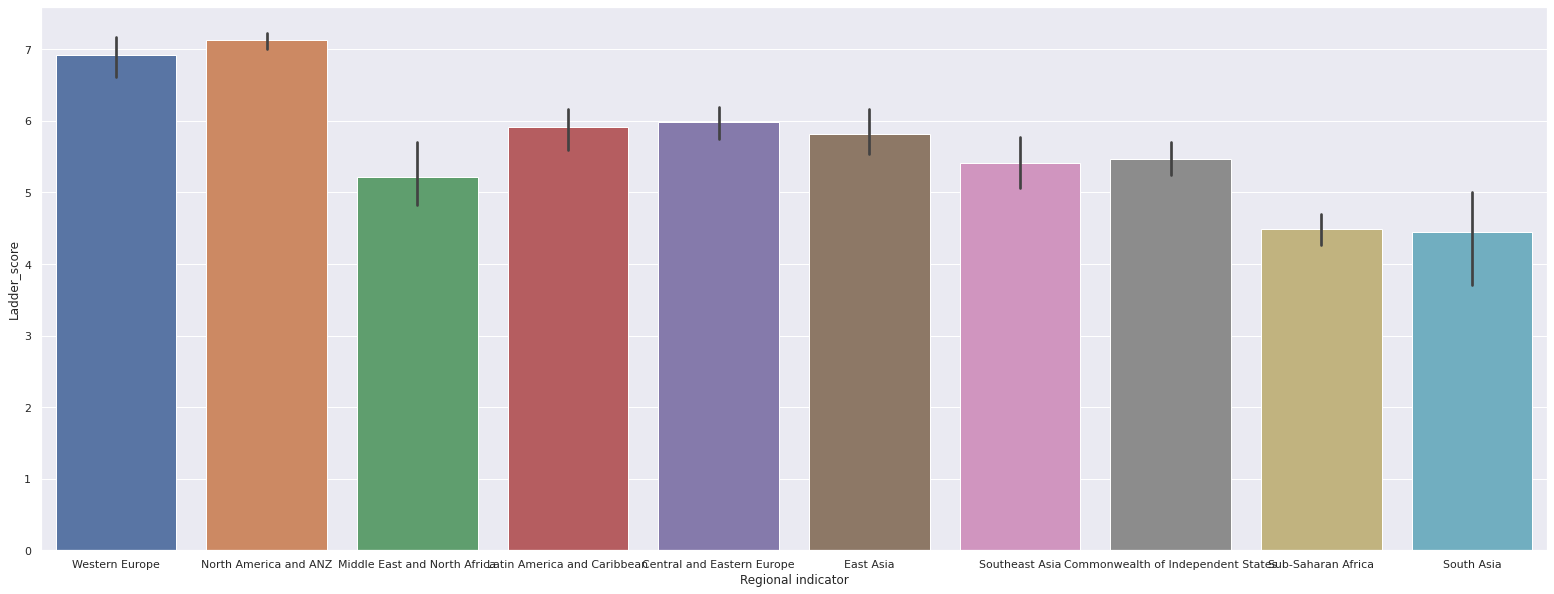

In [77]:
plt.figure(figsize=(27,10))
sns.set()
sns.barplot(x=happiness2021['Regional indicator'], y=happiness2021['Ladder_score'])

In [78]:
px.box(happiness2021, x= 'Regional indicator' , y='Ladder_score', color= 'Regional indicator')

In [79]:
px.pie(happiness2021, values='Ladder_score', names= 'Regional indicator' , title= 'Ladder score of Regions 2021', 
       width=800 , height=800 , color_discrete_sequence = px.colors.sequential.RdBu)

In [80]:
px.scatter(happiness2021, x='Logged_GDP_per_capita', y='Ladder_score' ,  color='Regional indicator' )

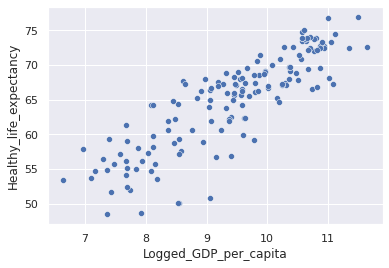

In [81]:
sns.scatterplot(data=happiness2021, x="Logged_GDP_per_capita", y="Healthy_life_expectancy")


Machine Learning Part (Linear Regression)

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [83]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(happiness2021, test_size=0.2, random_state=12345)
print('Training set has', train.shape[0], 'rows')
print('Test set has', test.shape[0], 'rows')

Training set has 119 rows
Test set has 30 rows


In [84]:
model.fit(X=train[["Logged_GDP_per_capita"]], y=train["Healthy_life_expectancy"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
model.intercept_
model.coef_
print('The estimated regression function is:\n\n Healthy Life Expectancy =', np.round(model.intercept_,2), '+', np.round(model.coef_[0],2), '* GDP')

The estimated regression function is:

 Healthy Life Expectancy = 16.86 + 5.09 * GDP


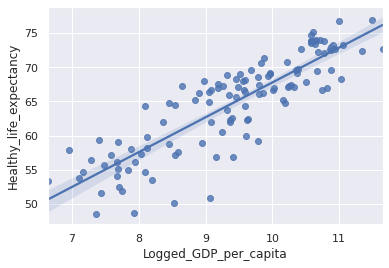

In [86]:
sns.regplot(x=train[["Logged_GDP_per_capita"]], y=train["Healthy_life_expectancy"])

In [87]:
y_pred = model.predict(test[['Logged_GDP_per_capita']])

In [88]:
y_pred

array([62.91982187, 73.30172847, 55.9442397 , 65.58276309, 71.37707879,
       58.20493932, 65.07868818, 71.83023705, 54.34545663, 69.19784582,
       70.60823726, 70.47076228, 69.60008742, 60.06339735, 60.39944729,
       60.34853063, 61.43814712, 58.33223097, 65.87298805, 68.13877933,
       70.22636232, 66.21412966, 64.96667153, 59.43203079, 64.90557154,
       72.5227036 , 60.75077223, 73.46466178, 67.05934618, 71.96771203])

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [91]:
mean_squared_error(y_true=test['Healthy_life_expectancy'], y_pred=y_pred)

10.298329379946773

In [92]:
mean_absolute_error(y_true=test['Healthy_life_expectancy'], y_pred=y_pred)

2.163916991774559

In [93]:
 r2_score(y_true=test['Healthy_life_expectancy'], y_pred=y_pred)

0.696589301719237

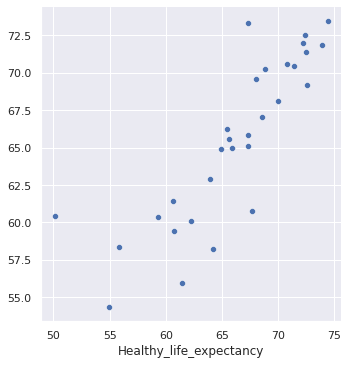

In [94]:
sns.relplot(x=test['Healthy_life_expectancy'], y=y_pred, kind="scatter")

In [28]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [96]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cv_scores = cross_val_score(estimator=model, X=happiness2021[['Logged_GDP_per_capita']], y=happiness2021['Healthy_life_expectancy'], scoring="neg_mean_squared_error", cv=5)
cv_scores

array([ -6.33376348,  -8.47949108, -13.22262139, -14.99310479,
       -19.42493997])

In [97]:
-cv_scores.mean()

12.490784141421814

In [26]:
from sklearn.model_selection import cross_validate
scoring_functions = {"negMSE": "neg_mean_squared_error", "negMAE": "neg_mean_absolute_error", "r2":"r2"}
cv_info = cross_validate(estimator=model, X=happiness2021[['Logged_GDP_per_capita']], y=happiness2021['Healthy_life_expectancy'], scoring=scoring_functions, cv=10, return_train_score=True)
cv_happiness2021 = pd.DataFrame(cv_info)
cv_happiness2021

,fit_time,score_time,test_negMSE,train_negMSE,test_negMAE,train_negMAE,test_r2,train_r2
0,0.001511,0.001434,-2.895291,-12.868547,-1.364191,-2.819531,-5.939097,0.691065
1,0.001216,0.001201,-9.911513,-12.077714,-2.571407,-2.661187,-0.291463,0.731535
2,0.001175,0.001407,-4.447147,-12.690234,-1.739191,-2.773440,0.565291,0.728814
3,0.001527,0.001525,-11.892725,-11.873592,-2.921666,-2.650345,-1.146489,0.750146
4,0.001191,0.001127,-6.467197,-12.487399,-2.180105,-2.746115,0.512331,0.737255
5,0.001209,0.001161,-19.485785,-10.992652,-3.573025,-2.560396,0.412532,0.760805
6,0.001180,0.001164,-13.482901,-11.720495,-3.080986,-2.586673,0.443772,0.728131
7,0.001086,0.001165,-15.234517,-11.485721,-2.881818,-2.617918,0.501266,0.733265
8,0.001166,0.001032,-21.893435,-10.837579,-3.504010,-2.553191,0.334915,0.748774
9,0.001091,0.001038,-17.361484,-11.296293,-3.281412,-2.584960,-0.528892,0.714149


In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(happiness2021, test_size=0.2, random_state=12345)
print('Training set has', train.shape[0], 'rows')
print('Test set has', test.shape[0], 'rows')

Training set has 119 rows
Test set has 30 rows


In [14]:
happiness2021 = happiness2021.set_index("Ladder_score")

In [15]:
happiness2021 = happiness2021.drop(2.523)
happiness2021

,Country name,Regional indicator,Standard error of ladder score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder score in Dystopia,Dystopia + residual
Ladder_score,,,,,,,,,,,,,
7.842,Finland,Western Europe,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,3.253
7.620,Denmark,Western Europe,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,2.868
7.571,Switzerland,Western Europe,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,2.839
7.554,Iceland,Western Europe,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,2.967
7.464,Netherlands,Western Europe,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,2.798
7.392,Norway,Western Europe,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,2.580
7.363,Sweden,Western Europe,0.036,7.433,7.293,10.867,0.934,72.700,0.945,0.086,0.237,2.43,2.683
7.324,Luxembourg,Western Europe,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,2.653
7.277,New Zealand,North America and ANZ,0.040,7.355,7.198,10.643,0.948,73.400,0.929,0.134,0.242,2.43,2.612


In [ ]:
happiness2021.reset_index

In [17]:
happiness2021.head()

,Country name,Regional indicator,Standard error of ladder score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder score in Dystopia,Dystopia + residual
Ladder_score,,,,,,,,,,,,,
7.842,Finland,Western Europe,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,3.253
7.620,Denmark,Western Europe,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,2.868
7.571,Switzerland,Western Europe,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,2.839
7.554,Iceland,Western Europe,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,2.967
7.464,Netherlands,Western Europe,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,2.798


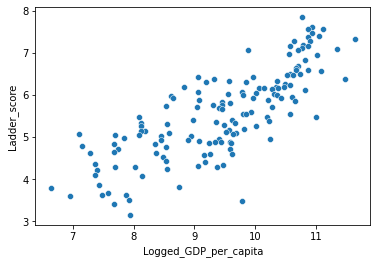

In [18]:
sns.scatterplot(data=happiness2021, x="Logged_GDP_per_capita", y="Ladder_score")

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
model.fit(X=train[["Logged_GDP_per_capita"]], y=train["Ladder_score"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.intercept_
model.coef_
print('The estimated regression function is:\n\n Ladder Score =', np.round(model.intercept_,2), '+', np.round(model.coef_[0],2), '* GDP')

The estimated regression function is:

 Ladder Score = -1.04 + 0.7 * GDP


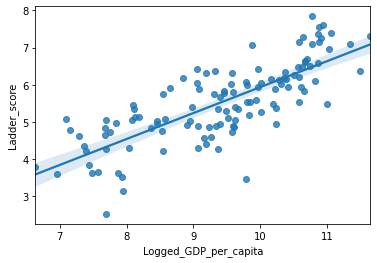

In [22]:
sns.regplot(x=train[["Logged_GDP_per_capita"]], y=train["Ladder_score"])

In [34]:
y_predGDP = model.predict(test[['Logged_GDP_per_capita']])

In [35]:
y_predGDP

array([5.27188689, 6.6947108 , 4.31589436, 5.63683878, 6.4309406 ,
       4.62571967, 5.56775611, 6.49304522, 4.09678366, 6.13228016,
       6.32557208, 6.30673135, 6.18740674, 4.88041841, 4.92647353,
       4.91949548, 5.0688257 , 4.64316479, 5.67661365, 5.98713677,
       6.27323672, 5.72336657, 5.5524044 , 4.79389062, 5.54403074,
       6.58794667, 4.97462206, 6.71704055, 5.83920216, 6.51188595])

In [36]:
mean_squared_error(y_true=test['Ladder_score'], y_pred=y_predGDP)

0.40208819885935976

In [37]:
mean_absolute_error(y_true=test['Ladder_score'], y_pred=y_predGDP)

0.5362179355208296

In [38]:
r2_score(y_true=test['Ladder_score'], y_pred=y_predGDP)

0.6860071919388055

In [49]:
sns.set_style("darkgrid")

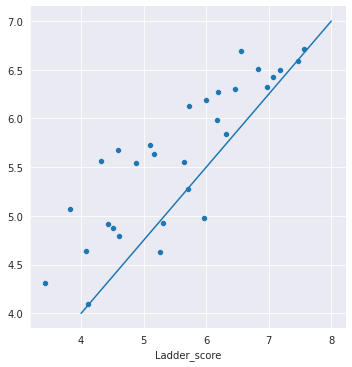

In [50]:
sns.relplot(x=test['Ladder_score'], y=y_pred, kind="scatter")
import matplotlib.pyplot as plt
plt.plot(np.linspace(4, 8, 100),np.linspace(4, 7, 100)) # add diagonal line

In [58]:
happiness2021 = happiness2021.reset_index()

In [59]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cv_scores = cross_val_score(estimator=model, X=happiness2021[['Logged_GDP_per_capita']], y=happiness2021['Ladder_score'], scoring="neg_mean_squared_error", cv=5)
cv_scores

array([-1.10476397, -0.28371393, -0.33937527, -0.44685053, -1.15186742])

In [117]:
-cv_scores.mean()

0.6653142239032249

In [118]:
from sklearn.model_selection import cross_validate
scoring_functions = {"negMSE": "neg_mean_squared_error", "negMAE": "neg_mean_absolute_error", "r2":"r2"}
cv_info = cross_validate(estimator=model, X=happiness2021[['Logged_GDP_per_capita']], y=happiness2021['Ladder_score'], scoring=scoring_functions, cv=10, return_train_score=True)
cv_happiness2021 = pd.DataFrame(cv_info)
cv_happiness2021

,fit_time,score_time,test_negMSE,train_negMSE,test_negMAE,train_negMAE,test_r2,train_r2
0,0.002274,0.003334,-1.069446,-0.368815,-0.999848,-0.493428,-23.061386,0.539759
1,0.001336,0.001520,-0.300742,-0.428319,-0.408300,-0.539212,-5.232769,0.591117
2,0.001827,0.001410,-0.302645,-0.426591,-0.406016,-0.537308,-37.391822,0.629127
3,0.001172,0.001086,-0.237948,-0.433554,-0.373956,-0.539675,-43.949652,0.635351
4,0.001180,0.001151,-0.208794,-0.436653,-0.395146,-0.536670,-15.360574,0.639241
5,0.001132,0.001148,-0.427294,-0.414132,-0.586273,-0.515507,-48.747463,0.657259
6,0.001137,0.001093,-0.455606,-0.412020,-0.585459,-0.517619,-108.449817,0.651446
7,0.001390,0.001383,-0.372856,-0.419197,-0.550749,-0.519138,-44.694992,0.633518
8,0.001520,0.001444,-0.695789,-0.388837,-0.732346,-0.498072,-38.660080,0.630911
9,0.001446,0.001406,-1.112529,-0.355235,-0.861037,-0.489332,-13.053182,0.557724


In [60]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(happiness2021, test_size=0.2, random_state=12345)
print('Training set has', train.shape[0], 'rows')
print('Test set has', test.shape[0], 'rows')

Training set has 118 rows
Test set has 30 rows


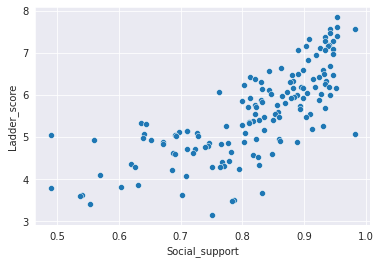

In [61]:
sns.scatterplot(data=happiness2021, x="Social_support", y="Ladder_score")

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [65]:
model.fit(X=train[["Social_support"]], y=train["Ladder_score"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
model.intercept_
model.coef_
print('The estimated regression function is:\n\n Ladder Score =', np.round(model.intercept_,2), '+', np.round(model.coef_[0],2), '* social support')

The estimated regression function is:

 Ladder Score = -0.02 + 6.79 * social support


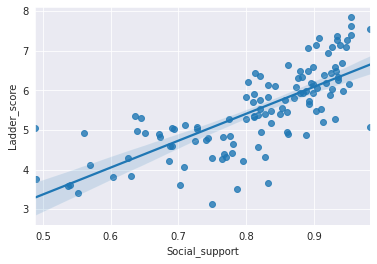

In [67]:
sns.regplot(x=train[["Social_support"]], y=train["Ladder_score"])

In [68]:
y_predSS = model.predict(test[['Social_support']])

In [69]:
y_predSS

array([5.56745076, 5.70995451, 5.84567236, 4.33241828, 6.32068485,
       4.80064488, 4.18312864, 6.36140021, 5.44530469, 5.15351131,
       6.40890146, 6.41568735, 4.71242828, 5.61495201, 5.73031219,
       5.58780844, 5.73709808, 5.80495701, 4.80064488, 5.96781843,
       6.3681861 , 5.30280095, 6.32747075, 4.86850381, 5.42494701,
       6.374972  , 5.04493702, 6.374972  , 5.6217379 , 6.13067986])

In [71]:
mean_squared_error(y_true=test['Ladder_score'], y_pred=y_predSS)

0.48780441540320907

In [72]:
mean_absolute_error(y_true=test['Ladder_score'], y_pred=y_predSS)

0.5603443817381779

In [73]:
r2_score(y_true=test['Ladder_score'], y_pred=y_predSS)

0.5179942471584005

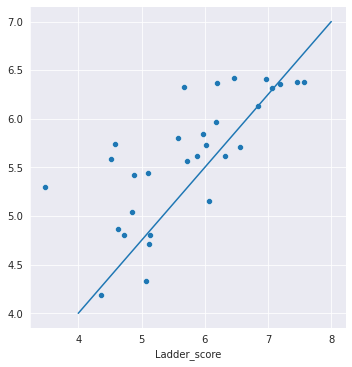

In [74]:
sns.relplot(x=test['Ladder_score'], y=y_predSS, kind="scatter")
import matplotlib.pyplot as plt
plt.plot(np.linspace(4, 8, 100),np.linspace(4, 7, 100))

In [131]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cv_scores = cross_val_score(estimator=model, X=happiness2021[['Social_support']], y=happiness2021['Ladder_score'], scoring="neg_mean_squared_error", cv=5)
cv_scores

array([-1.55713071, -0.14495276, -0.28970313, -0.70510882, -1.39136345])

In [132]:
-cv_scores.mean()

0.8176517756884124

In [133]:
from sklearn.model_selection import cross_validate
scoring_functions = {"negMSE": "neg_mean_squared_error", "negMAE": "neg_mean_absolute_error", "r2":"r2"}
cv_info = cross_validate(estimator=model, X=happiness2021[['Social_support']], y=happiness2021['Ladder_score'], scoring=scoring_functions, cv=10, return_train_score=True)
cv_happiness2021 = pd.DataFrame(cv_info)
cv_happiness2021

,fit_time,score_time,test_negMSE,train_negMSE,test_negMAE,train_negMAE,test_r2,train_r2
0,0.001911,0.001698,-1.519233,-0.412563,-1.219233,-0.496931,-33.181111,0.485167
1,0.001543,0.001545,-0.479614,-0.498617,-0.637439,-0.539683,-8.939821,0.524009
2,0.001610,0.001514,-0.151132,-0.529359,-0.291567,-0.574404,-18.171802,0.539782
3,0.001437,0.001361,-0.132113,-0.531259,-0.288492,-0.574962,-23.956834,0.553174
4,0.001367,0.001500,-0.122928,-0.532501,-0.288584,-0.574859,-8.632328,0.560051
5,0.001450,0.001392,-0.409519,-0.502478,-0.511046,-0.551216,-46.678076,0.584143
6,0.001471,0.001428,-0.842792,-0.465336,-0.755437,-0.531517,-201.463036,0.606343
7,0.001478,0.001611,-0.367448,-0.505735,-0.493291,-0.551922,-44.032258,0.557862
8,0.001547,0.001568,-0.857155,-0.458724,-0.802015,-0.521601,-47.857965,0.564574
9,0.001587,0.001475,-1.406314,-0.405910,-0.929024,-0.511061,-16.764204,0.494632


In [75]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(happiness2021, test_size=0.2, random_state=12345)
print('Training set has', train.shape[0], 'rows')
print('Test set has', test.shape[0], 'rows')

Training set has 118 rows
Test set has 30 rows


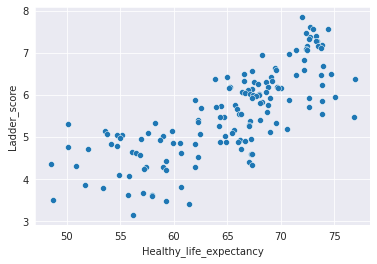

In [76]:
sns.scatterplot(data=happiness2021, x="Healthy_life_expectancy", y="Ladder_score")

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [78]:
model.fit(X=train[["Healthy_life_expectancy"]], y=train["Ladder_score"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
model.intercept_
model.coef_
print('The estimated regression function is:\n\n Ladder Score =', np.round(model.intercept_,2), '+', np.round(model.coef_[0],2), '* healthy life expectancy')

The estimated regression function is:

 Ladder Score = -2.26 + 0.12 * healthy life expectancy


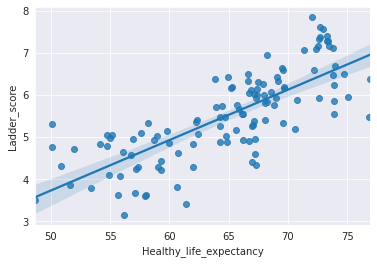

In [80]:
sns.regplot(x=train[["Healthy_life_expectancy"]], y=train["Ladder_score"])

In [81]:
y_predHL = model.predict(test[["Healthy_life_expectancy"]])

In [82]:
y_predHL

array([6.43389012, 5.80316393, 5.84196311, 4.18018459, 6.42191507,
       5.6794616 , 3.54526713, 6.58956585, 5.58054764, 5.69167616,
       6.21917737, 6.29018945, 6.00266836, 5.16453419, 5.8831573 ,
       5.19447183, 5.80579844, 5.96674319, 4.1484507 , 6.12253867,
       5.978838  , 4.83749542, 5.22440947, 4.50566661, 5.64413518,
       6.40994001, 4.99484765, 6.64944113, 5.95452863, 6.38587015])

In [83]:
mean_squared_error(y_true=test['Ladder_score'], y_pred=y_predHL)

0.48720673356393895

In [84]:
mean_absolute_error(y_true=test['Ladder_score'], y_pred=y_predHL)

0.6052193966727164

In [85]:
r2_score(y_true=test['Ladder_score'], y_pred=y_predHL)

0.5185848241925566

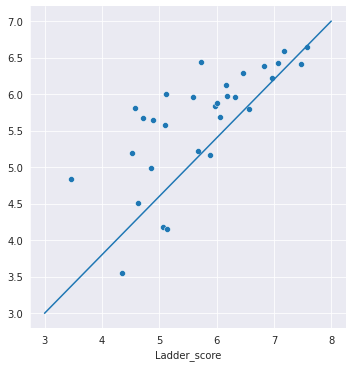

In [89]:
sns.relplot(x=test['Ladder_score'], y=y_predHL, kind="scatter")
import matplotlib.pyplot as plt
plt.plot(np.linspace(3, 8, 100),np.linspace(3, 7, 100))


In [146]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cv_scores = cross_val_score(estimator=model, X=happiness2021[['Healthy_life_expectancy']], y=happiness2021['Ladder_score'], scoring="neg_mean_squared_error", cv=5)
cv_scores

array([-1.38768253, -0.17540275, -0.4858577 , -0.55031677, -1.31046331])

In [147]:
-cv_scores.mean()

0.7819446125421259

In [148]:
cv_happiness2021

,fit_time,score_time,test_negMSE,train_negMSE,test_negMAE,train_negMAE,test_r2,train_r2
0,0.001911,0.001698,-1.519233,-0.412563,-1.219233,-0.496931,-33.181111,0.485167
1,0.001543,0.001545,-0.479614,-0.498617,-0.637439,-0.539683,-8.939821,0.524009
2,0.001610,0.001514,-0.151132,-0.529359,-0.291567,-0.574404,-18.171802,0.539782
3,0.001437,0.001361,-0.132113,-0.531259,-0.288492,-0.574962,-23.956834,0.553174
4,0.001367,0.001500,-0.122928,-0.532501,-0.288584,-0.574859,-8.632328,0.560051
5,0.001450,0.001392,-0.409519,-0.502478,-0.511046,-0.551216,-46.678076,0.584143
6,0.001471,0.001428,-0.842792,-0.465336,-0.755437,-0.531517,-201.463036,0.606343
7,0.001478,0.001611,-0.367448,-0.505735,-0.493291,-0.551922,-44.032258,0.557862
8,0.001547,0.001568,-0.857155,-0.458724,-0.802015,-0.521601,-47.857965,0.564574
9,0.001587,0.001475,-1.406314,-0.405910,-0.929024,-0.511061,-16.764204,0.494632


In [107]:
happiness2021Num = happiness2021.drop(['Country name', 'Regional indicator'], axis=1)

In [111]:
happiness2021Num.head()

,Ladder_score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder score in Dystopia,Dystopia + residual
0,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,3.253
1,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,2.868
2,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,2.839
3,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,2.967
4,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,2.798


In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=happiness2021Num.iloc[:,1:], y=happiness2021Num.Ladder_score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
pd.Series(model.coef_, index=happiness2021Num.columns[1:])

Standard error of ladder score    0.125878
upperwhisker                      0.449976
lowerwhisker                      0.513629
Logged_GDP_per_capita             0.012674
Social_support                    0.082250
Healthy_life_expectancy           0.001155
Freedom_to_make_life_choices      0.044221
Generosity                        0.023724
Perceptions_of_corruption        -0.023502
Ladder score in Dystopia          0.000000
Dystopia + residual               0.036281
dtype: float64

R squared = 1.0


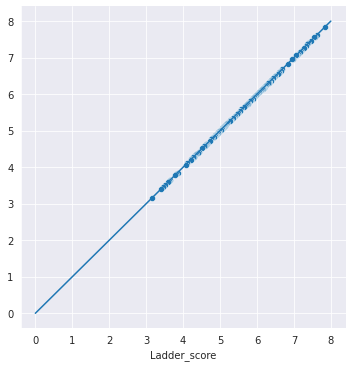

In [110]:
Ladder_pred = model.predict(happiness2021Num.iloc[:,1:])
sns.relplot(x=happiness2021Num.Ladder_score, y=Ladder_pred)

import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 8, 100),np.linspace(0, 8, 100)) # add diagonal line

print('R squared =', round(np.corrcoef(happiness2021Num.Ladder_score, y=Ladder_pred)[0,1]**2,3))